**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
from scipy.spatial import distance
from sklearn.neighbors import KDTree

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [3]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric = 'minkowski'):
        self.k = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        #запомнили датасет
        self.X = np.array(X)
        self.y = np.array(y)
        
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.X , metric = self.metric)
        
    
    def predict(self, X):
        y_pred = np.apply_along_axis(lambda x: MyKNeighborsClassifier.predict_object(self, x) , 1, np.array(X))
        return y_pred
    
    def predict_object(self, x):

        if self.algorithm == 'kd_tree':
            dist, top_k_ind = self.tree.query(np.array(x).reshape((1,-1)), k = self.k)
        else:
            dist = np.sqrt(np.sum((self.X - x)**2 , axis = 1)) #т.к метрика минковского по дефолту
            top_k_ind = np.argsort(dist.ravel())[:self.k] #берем k наименьших
            
        return np.argmax(np.bincount(self.y[top_k_ind.ravel()])) #выбираем наиболее частое значение
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

Wall time: 950 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [11]:
%time clf.predict(X_test)

Wall time: 4.04 ms


array([2, 1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1])

In [12]:
%time my_clf.predict(X_test)

Wall time: 1.96 ms


array([2, 1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1], dtype=int64)

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

Wall time: 9.97 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [16]:
%time my_clf.fit(X_train, y_train)

Wall time: 924 µs


In [17]:
%time clf.predict(X_test)

Wall time: 11 ms


array([1, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2])

In [18]:
%time my_clf.predict(X_test)

Wall time: 4.08 ms


array([1, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2], dtype=int64)

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [23]:
CountVec = CountVectorizer(min_df = 0.02) #возьмем слова которые встречаются хотя бы в 2 процентах текстов
data_vec = CountVec.fit_transform(data)

In [24]:
data_vec.shape

(11314, 657)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [25]:
from sklearn.model_selection import cross_val_score, KFold

In [26]:
kf = KFold(n_splits=3, random_state = 22, shuffle=True) #потом передадим kf в cross_val_score

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [28]:
def search_best_k(estimator, data, target, cv_splitter, metric = 'minkowski'):
    scores = []
    for k in range(1,11):
        model = estimator(n_neighbors=k, metric = metric)
        cross_val = cross_val_score(model , data , target ,scoring = 'accuracy' ,cv = cv_splitter)
        scores.append(np.mean(cross_val))
    return np.argmax(scores) + 1, scores

In [29]:
k, scores = search_best_k(KNeighborsClassifier, data_vec, target , kf)

In [30]:
print('Лучшее число соседов: ',k,' ,лучшее качество: ',np.max(scores))

Лучшее число соседов:  10  ,лучшее качество:  0.17146836206696955


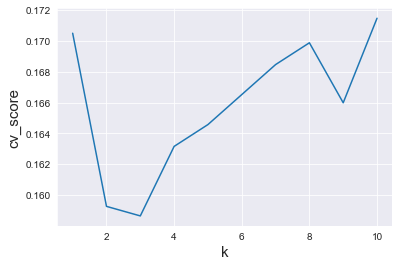

In [31]:
sns.set_style("darkgrid")
sns.lineplot(range(1,11) , scores )
plt.xlabel("k", fontsize = 15) 
plt.ylabel("cv_score", fontsize = 15) 
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [33]:
k, scores = search_best_k(KNeighborsClassifier, data_vec, target, kf,  metric = 'cosine')

In [34]:
print('Лучшее число соседов: ', k,', лучшее качество: ',np.max(scores))

Лучшее число соседов:  1 , лучшее качество:  0.22564985205038657


In [35]:
tf_idf = TfidfVectorizer()
data_tf_idf = tf_idf.fit_transform(data)

In [36]:
k, scores = search_best_k(KNeighborsClassifier, data_tf_idf, target, kf, metric = 'cosine')

In [37]:
print('Лучшее число соседов: ',k,' ,лучшее качество: ',np.max(scores))

Лучшее число соседов:  1  ,лучшее качество:  0.598461482435723


Лучшая модель: c k = 1,  tf_idf и косинусной метрикой

In [38]:
best_model = KNeighborsClassifier(n_neighbors = 1,  metric = 'cosine')
best_model.fit(data_tf_idf, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [39]:
newsgroups_test = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [40]:
data_test = newsgroups_test['data']
target_test = newsgroups_test['target']

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [41]:
test_tf_idf = tf_idf.transform(data_test)

In [42]:
y_test_pred = best_model.predict(test_tf_idf)

In [43]:
print('Точность: ', accuracy_score(y_test_pred, target_test))

Точность:  0.5088953797132236


Вывод: точность на кросс-валидации выше чем на тестовой выборке. 
Это происходит потому, что подбирая гиперпараметры на кросс-валидации мы все равно переобучаемся, т.к в оценку точности входят те же данные на которых мы обучались но уже в другой итерации. Грубо говоря, мы находим гиперпараметры, которые лучше всего подходят для этих конкретных данных, но никто не гарантируют, что они будут лучшими на всей генеральной совокупности. В итоге получаем смещенную оценку качества. 